___
<h1 style="color:blue;">Naive Bayes</h1>

___

## Introduction to Naive Bayes
Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It calculates the probability of each class given the feature values and selects the class with the highest probability.

### Key Concepts
- **Bayes' Theorem:** A mathematical formula that calculates the probability of a hypothesis given the data.
- **Conditional Probability:** The probability of an event given that another event has occurred
- **Independence:** The assumption that the features are independent of each other
- **Likelihood:** The probability of observing the data given the class
- **Prior Probability:** The probability of each class before observing the data
- **Posterior Probability:** The probability of each class after observing the data
- **Maximum A Posteriori (MAP):** The class with the highest posterior probability

### Algorithm
1. **Training:** Calculate the prior and conditional probabilities for each class based on the training data.
2. **Prediction:** For a new data point, calculate the likelihood of each class and select the class with the highest posterior probability.
3. **Evaluation:** Measure the performance of the model using metrics like accuracy, precision, recall, and F1 score.
4. **Hyperparameters:** Naive Bayes has few hyperparameters like the type of distribution (Gaussian, Multinomial, Bernoulli) and smoothing parameter.
5. **Pros and Cons:** Naive Bayes is simple, fast, and works well with high-dimensional data. However, it assumes feature independence and may not capture complex relationships.

### Applications
- **Text Classification:** Naive Bayes is widely used for spam filtering, sentiment analysis, and document categorization.
- **Medical Diagnosis:** It can be used to predict the presence of a disease based on symptoms and test results.
- **Recommendation Systems:** Naive Bayes can be used to recommend products or services based on user preferences.
- **Anomaly Detection:** It can identify unusual patterns in data that deviate from normal behavior.
- **Real-time Prediction:** Naive Bayes is suitable for applications that require quick predictions on streaming data.

## Data
The dataset used for this analysis is publicly available and contains features related to breast cancer diagnosis. Here are some key attributes:

- **id:** Unique patient identifier.
- **diagnosis:** Target variable indicating the type of cancer (Malignant or Benign).
- radius_mean, texture_mean, perimeter_mean, area_mean: Various measurements related to tumor characteristics.
- smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Additional features describing tumor properties.

### Data Source

The dataset is publicly available on Kaggle and can be found [here](https://www.kaggle.com/datasets/erdemtaha/cancer-data/data).


___
## <span style="color:blue;">Data Exploration and Preprocessing</span>

___


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('Cancer_Data.csv')

# Drop unnecessary columns if any
df = df.drop(columns=['Unnamed: 32'])



>  Making Histograms of the data to understand the distribution of the data.

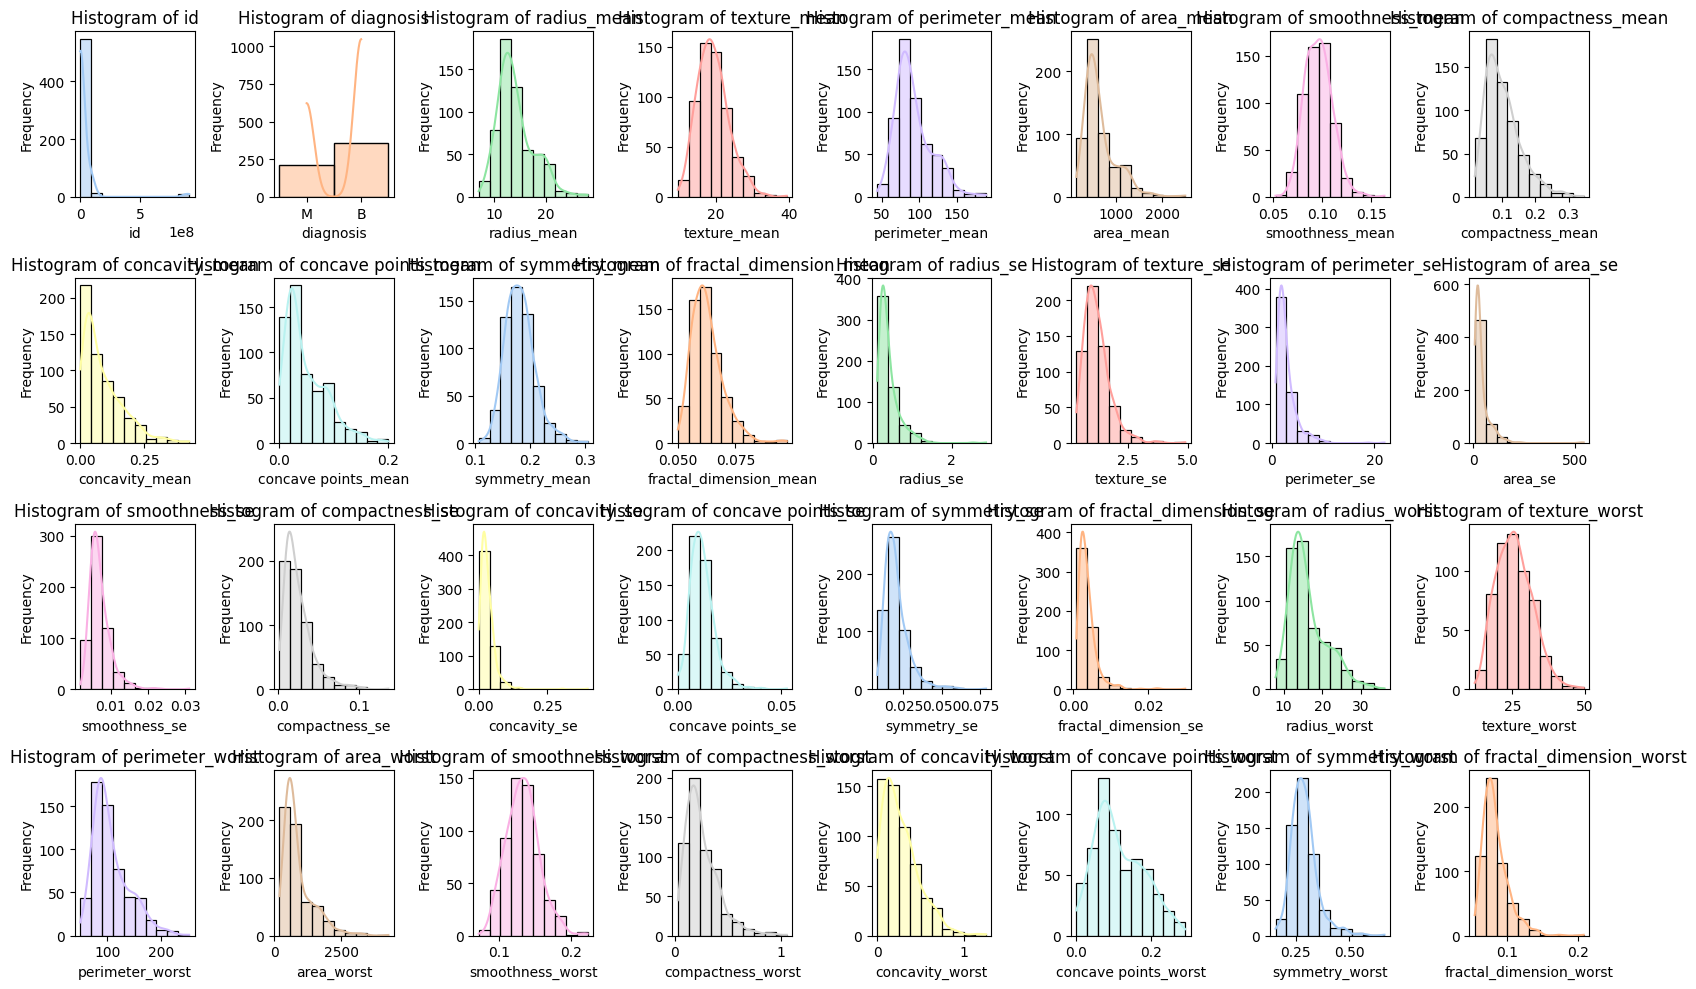

In [2]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(4, 8, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

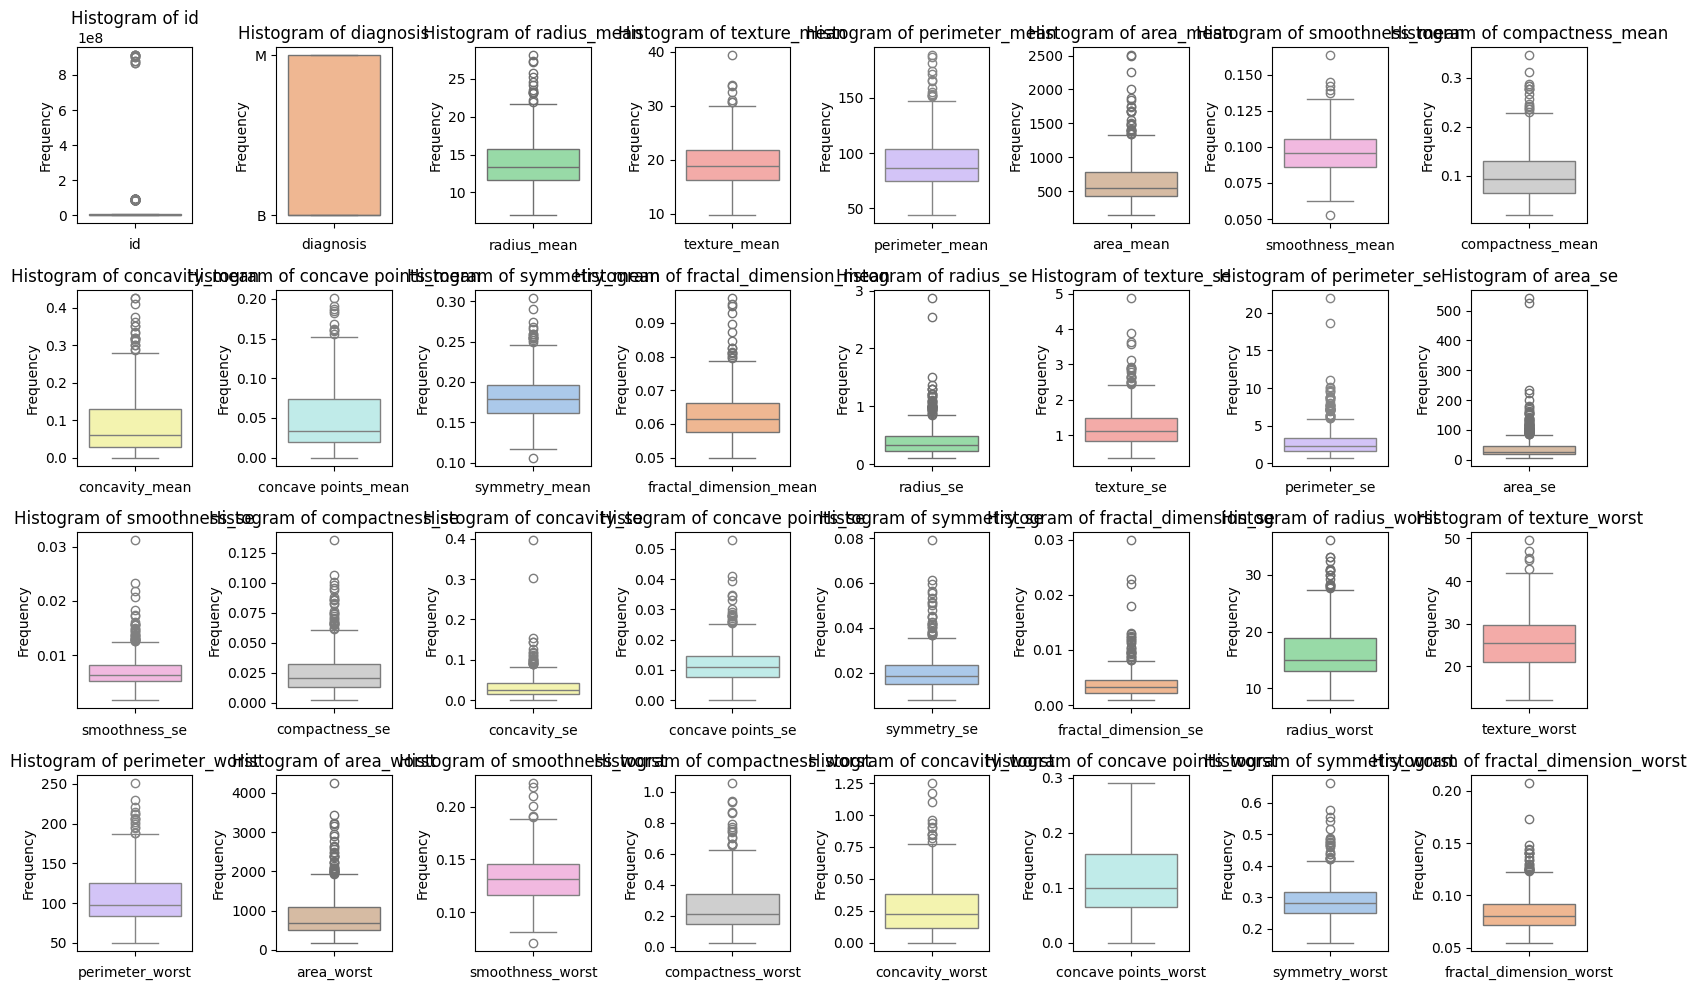

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(4, 8, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Preprocessing

In [4]:
# Encode the target variable
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Separate features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Correlation Analysis

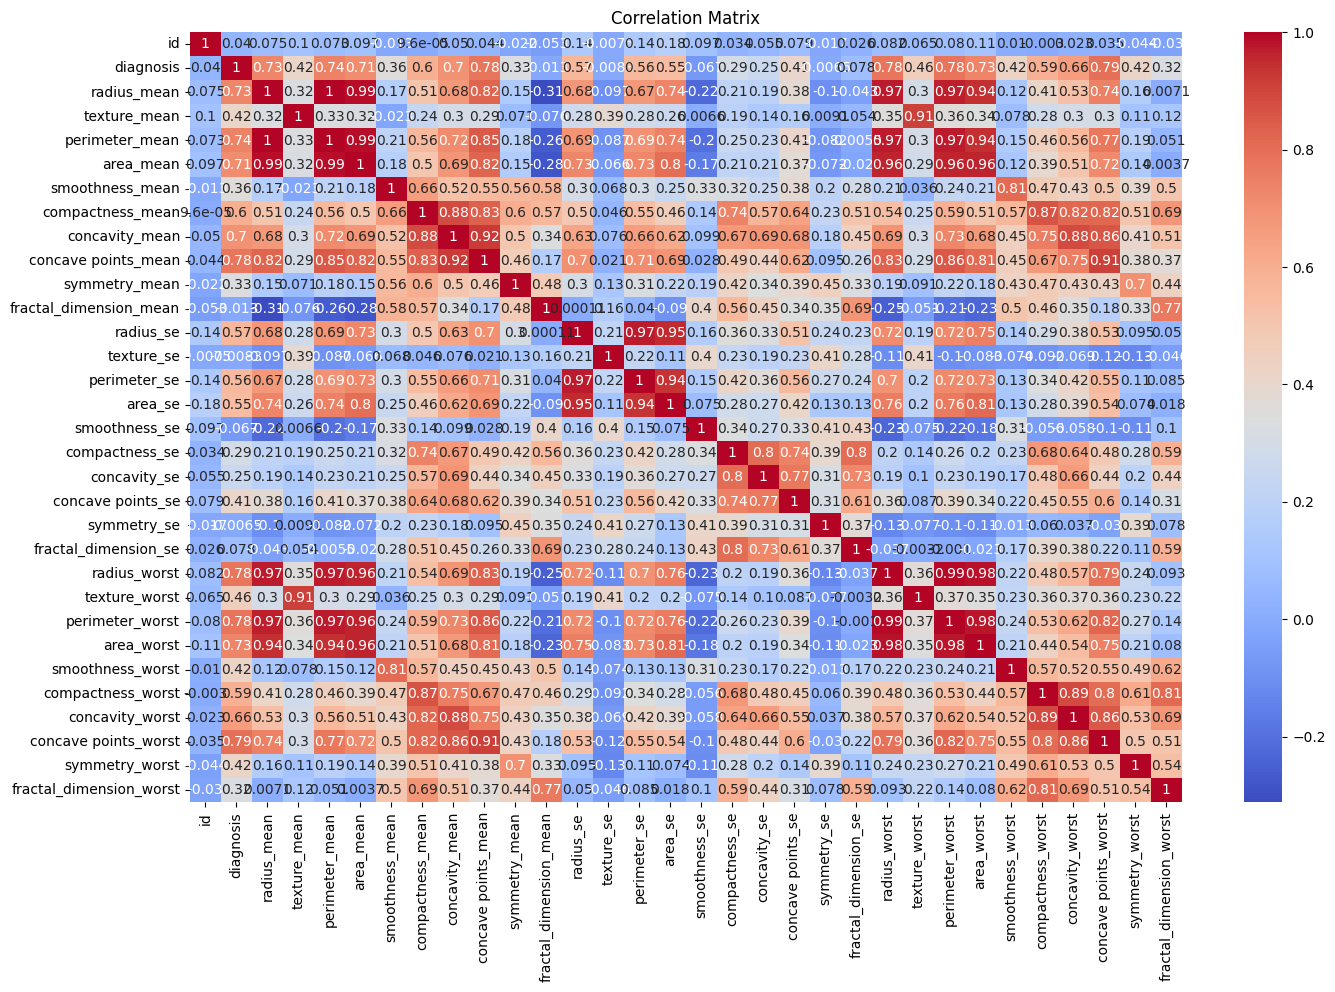

In [5]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Gaussian Naive Bayes Model:

Naive Bayes Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



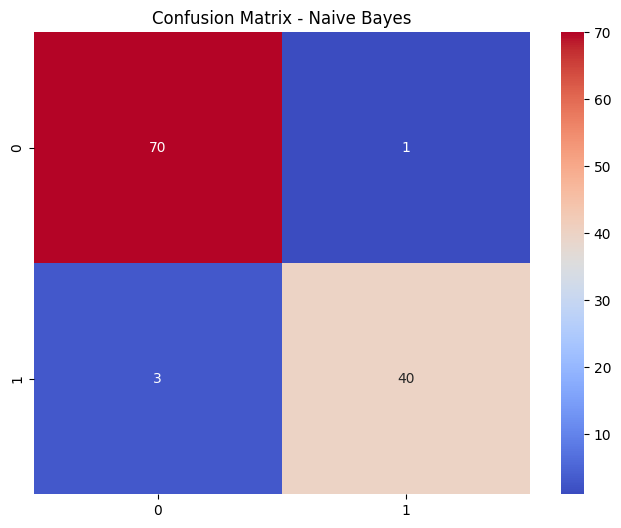

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Naive Bayes Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, nb_y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, nb_y_pred)
 
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

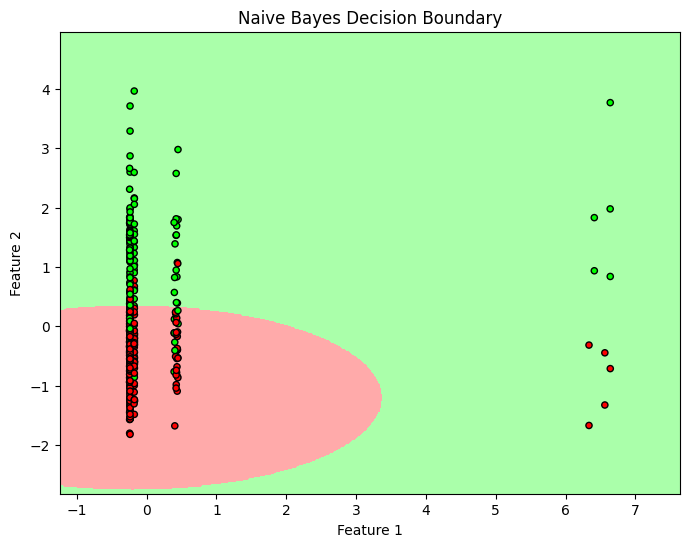

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select two features for visualization (e.g., the first two columns)
X_train_plot = X_train[:, :2]
X_test_plot = X_test[:, :2]

# Train the Naive Bayes model on the selected features
nb_model_plot = GaussianNB()
nb_model_plot.fit(X_train_plot, y_train)

# Create a function to plot the decision boundary
def plot_decision_boundary_nb(model, X, y):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Naive Bayes Decision Boundary")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary for the Naive Bayes model
plot_decision_boundary_nb(nb_model_plot, X_train_plot, y_train)


___
## <span style="color:blue;">CONCLUSION</span>

___


### Summary of Findings

In this analysis, a Naive Bayes classifier was used to predict breast cancer diagnoses based on clinical and morphological features from a comprehensive dataset. Here are the key findings:

**Introduction to Naive Bayes:**
Naive Bayes is a probabilistic classifier based on Bayes' theorem, with the assumption of independence between features. It calculates the probability of each class given the feature values and selects the class with the highest probability.

**Data Characteristics:**
The dataset encompasses various attributes related to breast cancer diagnosis, including measurements and characteristics derived from patient images.

**Exploratory Data Analysis (EDA):**

- **Data Distribution:** Histograms and box plots were utilized to visualize the distribution and spread of features across different cancer types.
- **Correlation Analysis:** A heatmap illustrated correlations among features, aiding in identifying potential predictors for cancer type.

**Model Development:**

- **Naive Bayes Model Training:** Utilized the Gaussian Naive Bayes classifier from Scikit-learn.
- **Model Evaluation:** Achieved an accuracy of 96.49% on the test set, demonstrating robust performance in predicting cancer diagnoses.
- **Visualization:** Plotted the decision boundary to visualize how Naive Bayes classifies data points based on feature probabilities.

### Insights and Recommendations

The Naive Bayes model showed promising results in predicting breast cancer diagnoses. Key insights and recommendations include:

- **Further Feature Exploration:** Explore additional features or transformations to potentially enhance model performance.
- **Handling Feature Independence:** Address the independence assumption by investigating feature selection or engineering techniques.
- **Comparison with Other Models:** Compare Naive Bayes with other classification models like SVM, Random Forests, or Gradient Boosting to evaluate relative performance.

### Acknowledgements

- **Data Source:** The dataset used in this analysis is publicly available on [Kaggle](https://www.kaggle.com/datasets/erdemtaha/cancer-data/data), providing valuable insights into breast cancer diagnosis using machine learning techniques.
- **Tools and Libraries:** Python was employed for data preprocessing, model training, and evaluation, leveraging libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn.

This concludes the analysis of breast cancer diagnosis prediction using Naive Bayes. Further refinement and exploration could lead to enhanced models for clinical decision support in healthcare settings.
